This file, binomial_option_pricing.py, implements a binomial option pricing model in Python. It includes the following key components:

1. Imports: Necessary libraries and modules, such as numpy, pydantic, matplotlib, and custom OptionInputs from quantmod.models.

2. Enums: Definitions for OptionType (CALL, PUT) and ExerciseStyle (AMERICAN, EUROPEAN).

3. BinomialOptionPricing Class:
    - Initialization: Sets up the option parameters, calculates necessary values (e.g., up and down factors, probabilities, discount factor), and initializes arrays for price, payoff, value, and delta.
    - _binomialoption Method: Calculates the option values using a binomial tree approach, iterating forward to compute prices and payoffs, and backward to compute option values and deltas.
    - plot_tree Method: Visualizes the binomial tree with option values using matplotlib.

4. Example Usage: Demonstrates how to instantiate the BinomialOptionPricing class with example input parameters, print the option tree values, and plot the tree.

This file is useful for understanding and visualizing the binomial option pricing model for both American and European options.


In [1]:
import numpy as np
import pandas as pd
from quantmod.markets import getData, getTicker

In [2]:
# Fetch the data by specifying the number of period
df1 = getData('AAPL', period='5d')

# Display the first five rows of the dataframe to check the results. 
df1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-01-27,224.020004,232.149994,223.979996,229.860001,94863400
2025-01-28,230.850006,240.190002,230.809998,238.259995,75707600
2025-01-29,234.119995,239.860001,234.009995,239.360001,45486100
2025-01-30,238.669998,240.789993,237.210007,237.589996,55658300
2025-01-31,247.190002,247.190002,233.440002,236.000000,100959800


In [3]:
import numpy as np

def binomial_option_pricing(S, K, T, r, sigma, N, option_type="call", american=False):
    """
    Binomial Options Pricing Model (BOPM)
    
    Parameters:
    S : float  -> Initial stock price
    K : float  -> Strike price
    T : float  -> Time to maturity (in years)
    r : float  -> Risk-free interest rate (annualized)
    sigma : float  -> Volatility of the underlying asset (annualized)
    N : int  -> Number of time steps
    option_type : str  -> "call" or "put"
    american : bool  -> If True, price an American option; otherwise, European
    
    Returns:
    float -> Option price
    """
    dt = T / N  # Time step size
    u = np.exp(sigma * np.sqrt(dt))  # Upward movement factor
    d = 1 / u  # Downward movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    
    # Step 1: Compute terminal option values
    stock_prices = np.array([S * (u ** j) * (d ** (N - j)) for j in range(N + 1)])
    if option_type == "call":
        option_values = np.maximum(stock_prices - K, 0)
    else:  # Put option
        option_values = np.maximum(K - stock_prices, 0)
    
    # Step 2: Work backward through the tree
    for i in range(N - 1, -1, -1):
        option_values = np.exp(-r * dt) * (p * option_values[1:] + (1 - p) * option_values[:-1])
        if american:
            stock_prices = np.array([S * (u ** j) * (d ** (i - j)) for j in range(i + 1)])
            if option_type == "call":
                option_values = np.maximum(option_values, stock_prices - K)
            else:
                option_values = np.maximum(option_values, K - stock_prices)
    
    return option_values[0]

# Example Usage
S = 100  # Stock price
K = 100  # Strike price
T = 1  # Time to maturity (1 year)
r = 0.05  # Risk-free rate (5%)
sigma = 0.2  # Volatility (20%)
N = 100  # Steps

european_call_price = binomial_option_pricing(S, K, T, r, sigma, N, "call", american=False)
american_call_price = binomial_option_pricing(S, K, T, r, sigma, N, "call", american=True)

european_put_price = binomial_option_pricing(S, K, T, r, sigma, N, "put", american=False)
american_put_price = binomial_option_pricing(S, K, T, r, sigma, N, "put", american=True)

print(f"European Call Price: {european_call_price:.2f}")
print(f"American Call Price: {american_call_price:.2f}")
print(f"European Put Price: {european_put_price:.2f}")
print(f"American Put Price: {american_put_price:.2f}")


European Call Price: 10.43
American Call Price: 10.43
European Put Price: 5.55
American Put Price: 6.08


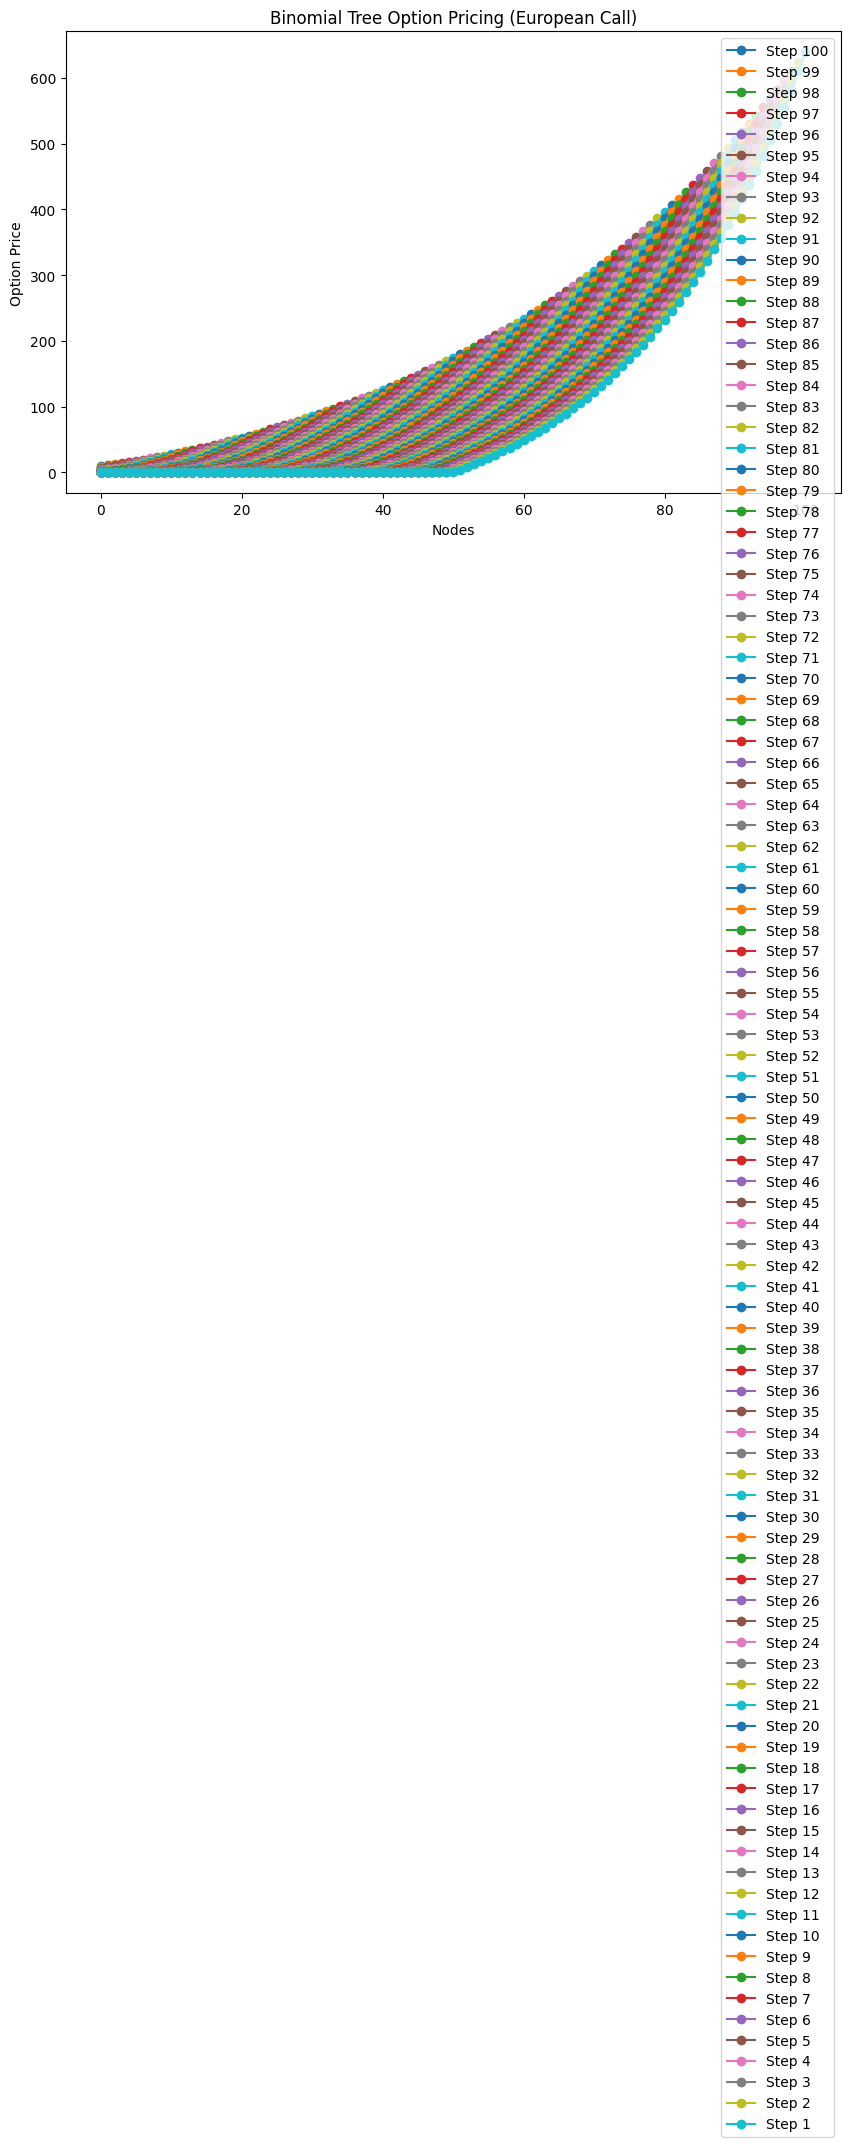

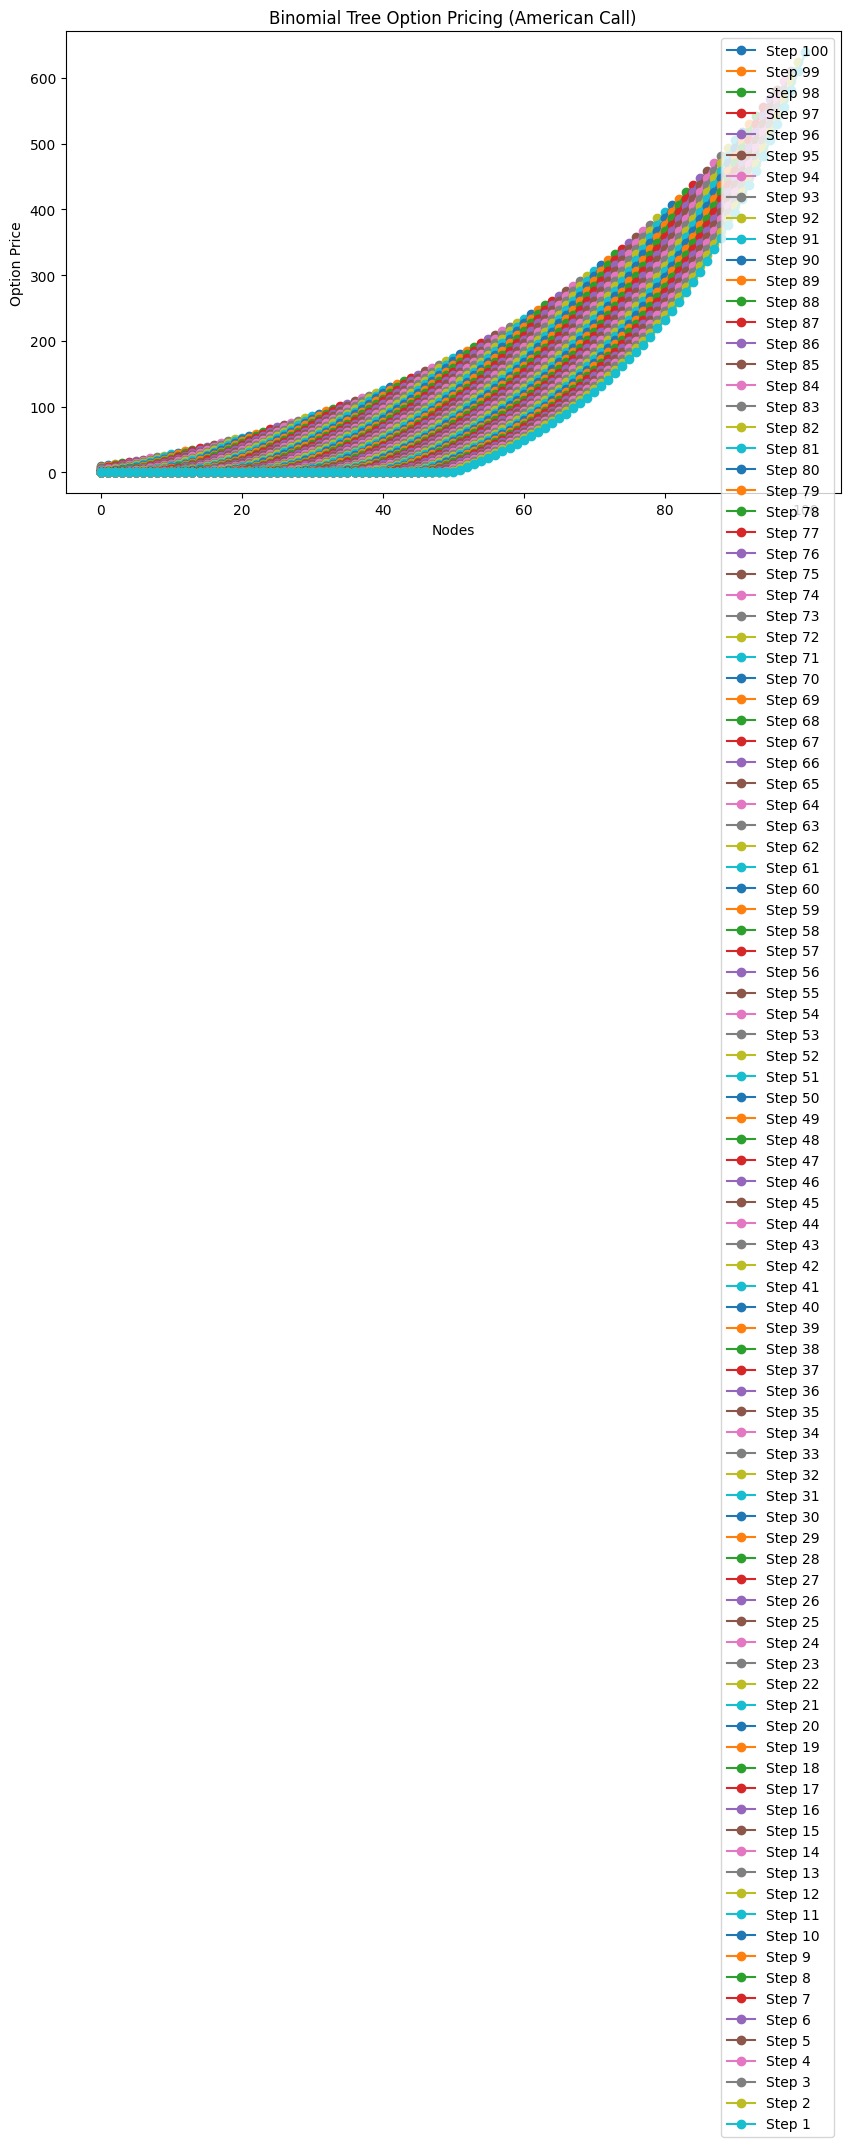

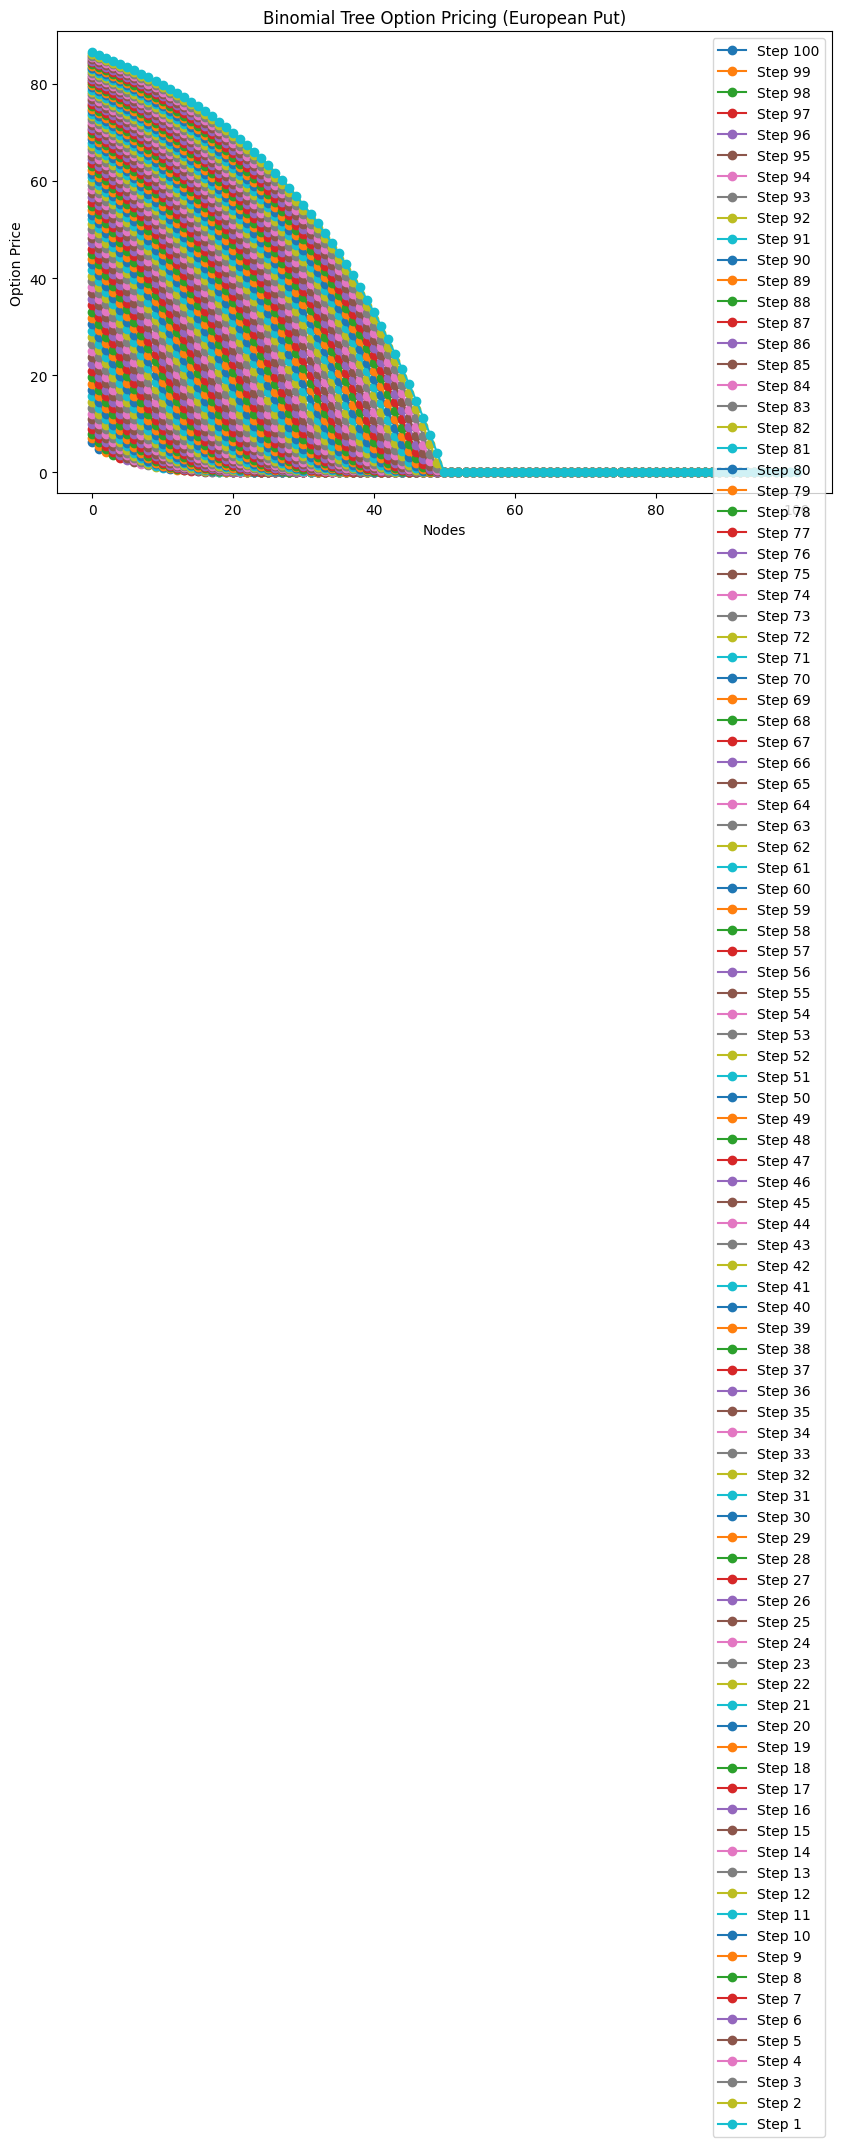

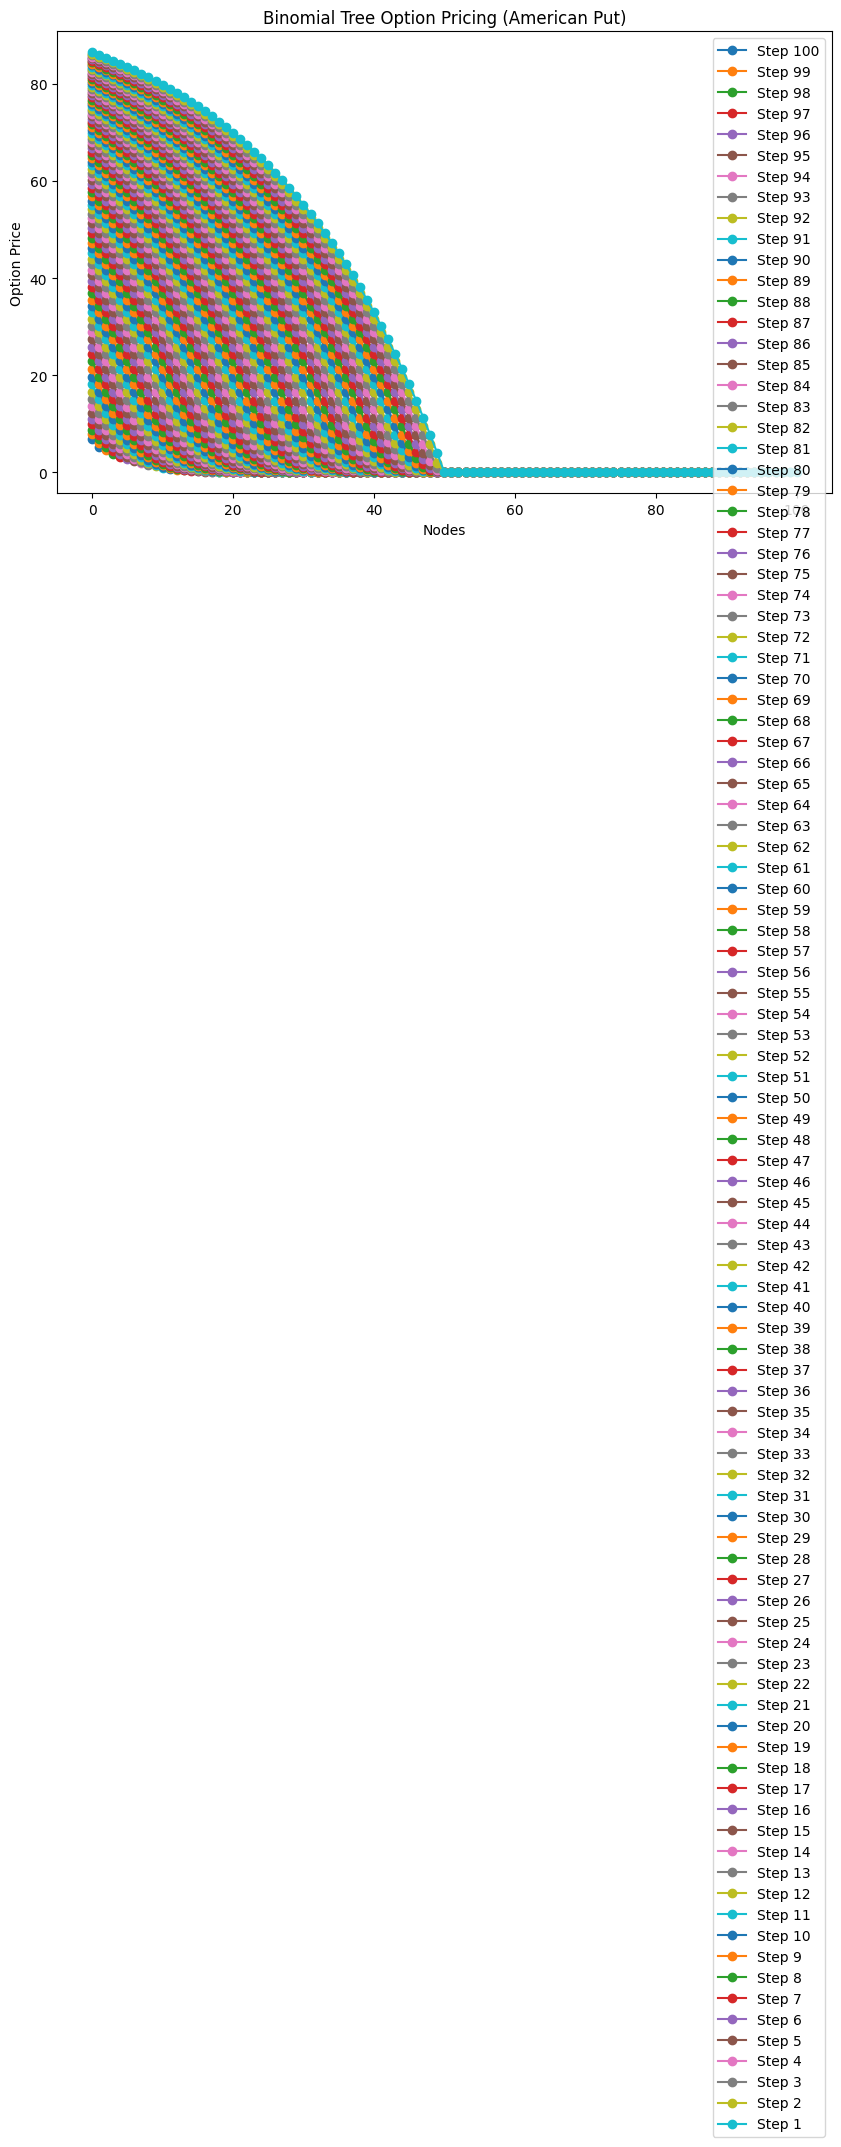

European Call Price: 10.43
American Call Price: 10.43
European Put Price: 5.55
American Put Price: 6.08


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_option_pricing(S, K, T, r, sigma, N, option_type="call", american=False):
    """
    Binomial Options Pricing Model (BOPM)
    
    Parameters:
    S : float  -> Initial stock price
    K : float  -> Strike price
    T : float  -> Time to maturity (in years)
    r : float  -> Risk-free interest rate (annualized)
    sigma : float  -> Volatility of the underlying asset (annualized)
    N : int  -> Number of time steps
    option_type : str  -> "call" or "put"
    american : bool  -> If True, price an American option; otherwise, European
    
    Returns:
    float -> Option price
    """
    dt = T / N  # Time step size
    u = np.exp(sigma * np.sqrt(dt))  # Upward movement factor
    d = 1 / u  # Downward movement factor
    p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability
    
    # Step 1: Compute terminal option values
    stock_prices = np.array([S * (u ** j) * (d ** (N - j)) for j in range(N + 1)])
    if option_type == "call":
        option_values = np.maximum(stock_prices - K, 0)
    else:  # Put option
        option_values = np.maximum(K - stock_prices, 0)
    
    # Step 2: Work backward through the tree
    price_tree = []
    for i in range(N - 1, -1, -1):
        price_tree.append(option_values.copy())
        option_values = np.exp(-r * dt) * (p * option_values[1:] + (1 - p) * option_values[:-1])
        if american:
            stock_prices = np.array([S * (u ** j) * (d ** (i - j)) for j in range(i + 1)])
            if option_type == "call":
                option_values = np.maximum(option_values, stock_prices - K)
            else:
                option_values = np.maximum(option_values, K - stock_prices)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    for i, level in enumerate(reversed(price_tree)):
        plt.plot(range(len(level)), level, marker='o', linestyle='-', label=f"Step {N-i}")
    plt.xlabel("Nodes")
    plt.ylabel("Option Price")
    plt.title(f"Binomial Tree Option Pricing ({'American' if american else 'European'} {option_type.capitalize()})")
    plt.legend()
    plt.show()
    
    return option_values[0]

# Example Usage
S = 100  # Stock price
K = 100  # Strike price
T = 1  # Time to maturity (1 year)
r = 0.05  # Risk-free rate (5%)
sigma = 0.2  # Volatility (20%)
N = 100  # Steps

european_call_price = binomial_option_pricing(S, K, T, r, sigma, N, "call", american=False)
american_call_price = binomial_option_pricing(S, K, T, r, sigma, N, "call", american=True)

european_put_price = binomial_option_pricing(S, K, T, r, sigma, N, "put", american=False)
american_put_price = binomial_option_pricing(S, K, T, r, sigma, N, "put", american=True)

print(f"European Call Price: {european_call_price:.2f}")
print(f"American Call Price: {american_call_price:.2f}")
print(f"European Put Price: {european_put_price:.2f}")
print(f"American Put Price: {american_put_price:.2f}")


In [1]:
import numpy as np
from pydantic import Field
from enum import Enum
import matplotlib.pyplot as plt
from typing import Optional
from quantmod.models import OptionInputs

In [7]:
# Enums for option types
class OptionType(str, Enum):
    CALL = "call"
    PUT = "put"

# Enums for exercise styles
class ExerciseStyle(str, Enum):
    AMERICAN = "american"
    EUROPEAN = "european"

In [8]:
# Class for Binomial Option Pricing
class BinomialOptionPricing:
    """
    Class for Binomial Option Pricing
    
    Parameters
    ----------
    inputs : OptionInputs
        Option inputs parameters
    nsteps : int
        Number of steps
    option_type : OptionType
        Option type, either 'call' or 'put'
    exercise_style : ExerciseStyle
        Exercise style, either 'american' or 'european'
    output : str, optional
        Output type ('price', 'payoff', 'value', 'delta'), by default 'payoff'
    
        
    Attributes
    ----------
    price : np.ndarray
        Matrix of option prices at each node in the binomial tree
    payoff : np.ndarray
        Matrix of option payoffs at each node
    value : np.ndarray
        Matrix of option values at each node
    delta : np.ndarray
        Matrix of option delta at each node
    binomialoption : np.ndarray
        The calculated option prices (depends on the selected output type)
    
    Methods
    -------
    plot_tree()
        Plots the binomial tree based on the selected output type
    """

    def __init__(self, 
                 inputs: OptionInputs, 
                 nsteps: int = Field(..., gt=0, description="Number of steps"), 
                 option_type: OptionType = Field(..., description="Call or Put"), 
                 exercise_style: ExerciseStyle = Field(..., description="American or European"),
                 output: Optional[str] = 'payoff'
                 ) -> None:
        
        self.inputs = inputs
        self.nsteps = nsteps
        self.option_type = option_type
        self.exercise_style = exercise_style
        self.output = output
        
        # Parameters
        self.dt = self.inputs.ttm / self.nsteps
        self.u = 1 + self.inputs.volatility * np.sqrt(self.dt)
        self.v = 1 - self.inputs.volatility * np.sqrt(self.dt)
        self.p = 0.5 + self.inputs.rate * np.sqrt(self.dt) / (2*self.inputs.volatility)
        self.df = 1 / (1 + self.inputs.rate * self.dt)
        
        # Initialize arrays
        self.price = np.zeros((self.nsteps+1, self.nsteps+1))
        self.payoff = np.zeros((self.nsteps+1, self.nsteps+1))
        self.value = np.zeros((self.nsteps+1, self.nsteps+1))
        self.delta = np.zeros((self.nsteps+1, self.nsteps+1))

        # Calculate option values
        self.binomialoption = self._binomialoption()

    def _binomialoption(self) -> np.ndarray:
        # Forward loop
        for j in range(self.nsteps+1):
            for i in range(j+1):
                self.price[i,j] = self.inputs.spot * np.power(self.v,i) * np.power(self.u,j-i)
                if self.option_type == OptionType.CALL:
                    self.payoff[i,j] = np.maximum(self.price[i,j] - self.inputs.strike, 0)
                else:
                    self.payoff[i,j] = np.maximum(self.inputs.strike - self.price[i,j], 0)

        # Reverse loop
        for j in range(self.nsteps, -1, -1):
            for i in range(j+1):
                if j == self.nsteps:
                    self.value[i,j] = self.payoff[i,j]
                    if self.option_type == OptionType.CALL:
                        self.delta[i,j] = 1 if self.price[i,j] > self.inputs.strike else 0
                    else:
                        self.delta[i,j] = -1 if self.price[i,j] < self.inputs.strike else 0
                else:
                    continuation_value = self.df * (self.p * self.value[i, j+1] + (1-self.p) * self.value[i+1, j+1])
                    self.value[i, j] = np.maximum(self.payoff[i, j] * 1 if self.exercise_style == ExerciseStyle.AMERICAN else 0, continuation_value)
                    self.delta[i,j] = (self.value[i,j+1] - self.value[i+1,j+1]) / (self.price[i,j+1] - self.price[i+1,j+1])
                
        if self.output == 'price':
            return np.around(self.price, 4)
        if self.output == 'payoff':
            return np.around(self.payoff, 4)
        elif self.output == 'value':
            return np.around(self.value, 4)
        elif self.output == 'delta':
            return np.around(self.delta, 4)
        else:
            raise ValueError("Invalid output type. Must be one of: 'price', 'payoff', 'value', 'delta'")
        
    def plot_tree(self):
        """Plot the binomial tree with option values"""
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.set_title(f"Binomial Tree \n\n {self.option_type}  - {self.exercise_style} - {self.output}")
        
        output_values = getattr(self, self.output)
        
        for j in range(self.nsteps + 1):
            for i in range(j + 1):
                x = j
                y = (j - 2*i)/2
                
                node_text = f"Spot: {self.price[i,j]:.2f}\n{self.output}: {output_values[i,j]:.4f}"
                ax.text(x, y, node_text, ha='center', va='center',
                        bbox=dict(facecolor='white', alpha=0.8))
                
                if j < self.nsteps:
                    ax.plot([x, x+1], [y, y+0.5], 'k-', lw=0.5)  # Up movement
                    ax.plot([x, x+1], [y, y-0.5], 'k-', lw=0.5)  # Down movement
        
        ax.set_xlim(-0.5, self.nsteps + 0.5)
        ax.set_ylim(-self.nsteps/2 - 0.5, self.nsteps/2 + 0.5)
        ax.axis('off')
        plt.show()


Option value tree:
[[ 6.1528  2.448   0.3716  0.      0.    ]
 [ 0.     11.0919  5.1876  0.8599  0.    ]
 [ 0.      0.     19.     10.9     1.99  ]
 [ 0.      0.      0.     27.1    19.81  ]
 [ 0.      0.      0.      0.     34.39  ]]


Plot the tree:


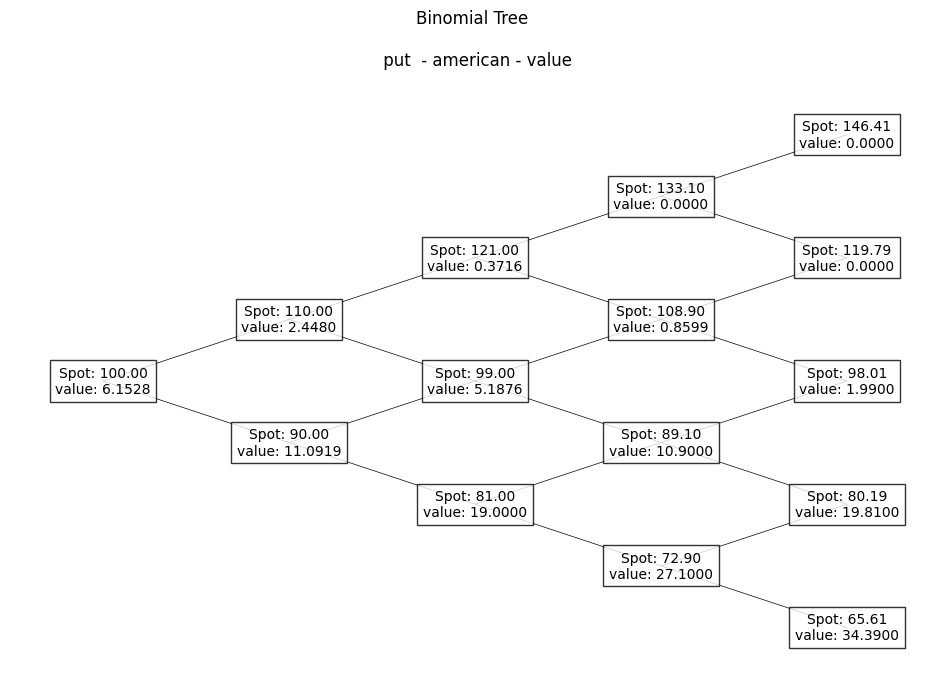

In [9]:
# Example 
if __name__ == "__main__":

    # Define input parameters
    inputs = OptionInputs(
    spot=100,
    strike=100,
    ttm=1,
    rate=0.05,
    volatility=0.2
    )

    # Instantiate the BinomialOptionPricing class
    pricer = BinomialOptionPricing(
        inputs=inputs,
        nsteps=4,
        option_type=OptionType.PUT,
        exercise_style=ExerciseStyle.AMERICAN,
        output='value'
    ) 

    # Print the tree values 
    print(f"\nOption {pricer.output} tree:")
    print(pricer.binomialoption)
    
    # Plot the tree
    print(f"\n\nPlot the tree:")
    pricer.plot_tree()

In [10]:
# Binomial Option Price
print(f"American Put Option Price using Binomial Tree Method: {pricer.value[0,0]:.2f}")

American Put Option Price using Binomial Tree Method: 6.15
